# Variable
A variable is any characteristic, number, or quantity that can be measured or counted.

## Types of Variables

* Variables
    * Numerical
        * Discrete
        * Continuous
    * Categorical
        * Nominal
        * Ordinal
        * Date/Time
    

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/loan.csv')
df.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


## Numerical Variables

A variable whoes values are numbers

### Discrete Variables

A variable whose values are whole numbers (counts) is called discrete.

0     4.0
1    13.0
2     8.0
3    20.0
4    14.0
5     5.0
6     9.0
7    14.0
8     9.0
9     9.0
Name: number_open_accounts, dtype: float64

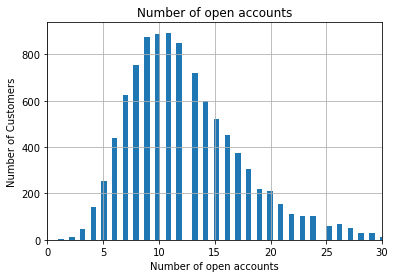

In [14]:
fig = df['number_open_accounts'].hist(bins=100)
fig.set_xlim(0, 30)
fig.set_title('Number of open accounts')
fig.set_xlabel('Number of open accounts')
fig.set_ylabel('Number of Customers')
df['number_open_accounts'][:10]

### Continuous Variables

A variable that may take any value within some range is called continuous.

0    15.4840
1    11.2032
2     8.5100
3     5.8656
4    18.7392
5    15.2448
6    16.9670
7    16.5500
8    25.5717
9     8.5440
Name: interest, dtype: float64

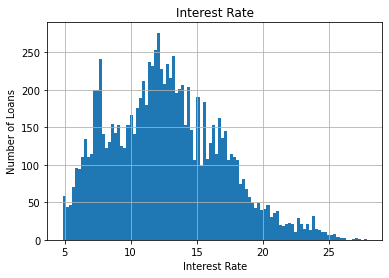

In [15]:
fig = df['interest'].hist(bins=100)

fig.set_title('Interest Rate')
fig.set_xlabel('Interest Rate')
fig.set_ylabel('Number of Loans')
df['interest'][:10]

## Categorical Variables
The values of categorical variables are selected from a group of categories, also called labels.

### Ordinal Variables
Categorical variables in which categories can be meaningfully ordered are called ordinal.

array(['C', 'B', 'A', 'E', 'D'], dtype=object)

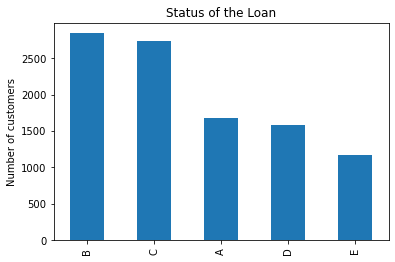

In [21]:
# market shows the risk band
fig = df['market'].value_counts().plot.bar()
fig.set_title('Status of the Loan')
fig.set_ylabel('Number of customers')
df['market'].unique()

### Nominal Variables 
Categorical variables that show no intrinsic order of the labels.

array(['RENT', 'OWNER', 'MORTGAGE'], dtype=object)

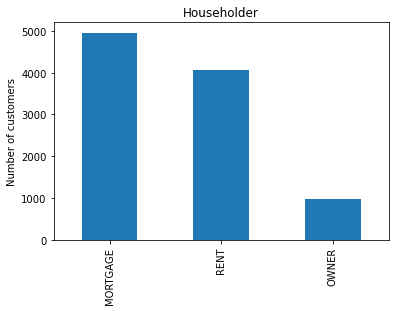

In [22]:
# type of household
fig = df['householder'].value_counts().plot.bar()
fig.set_title('Householder')
fig.set_ylabel('Number of customers')
df['householder'].unique()

### Data and Time Variables
Data and time, or datetime variables take dates and or time as values.
We can enrich the dataset dramatically by extracting information from the date and time.

In [24]:
df[['date_issued','date_last_payment']].dtypes

date_issued          object
date_last_payment    object
dtype: object

In [26]:
df['date_issued_dt'] = pd.to_datetime(df['date_issued'])
df['date_last_payment_dt'] = pd.to_datetime(df['date_last_payment'])

In [27]:
df[['date_issued', 'date_issued_dt', 'date_last_payment', 'date_last_payment_dt']].head()

,date_issued,date_issued_dt,date_last_payment,date_last_payment_dt
0,2013-06-11,2013-06-11,2016-01-14,2016-01-14
1,2014-05-08,2014-05-08,2016-01-25,2016-01-25
2,2013-10-26,2013-10-26,2014-09-26,2014-09-26
3,2015-08-20,2015-08-20,2016-01-26,2016-01-26
4,2014-07-22,2014-07-22,2016-01-11,2016-01-11


In [28]:
df['month'] = df['date_issued_dt'].dt.month
df['year'] = df['date_issued_dt'].dt.year

Text(0, 0.5, 'Disbursed Amount')

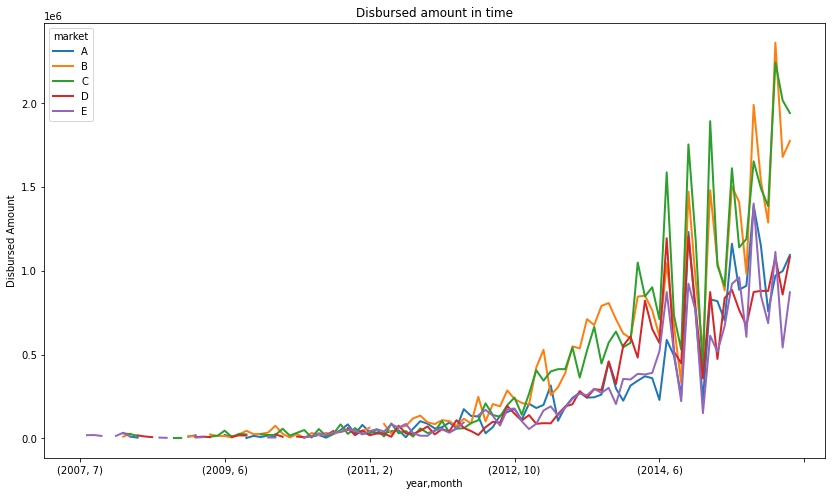

In [30]:
fig = df.groupby(['year','month', 'market'])['disbursed_amount'].sum().unstack().plot(
    figsize=(14, 8), linewidth=2)

fig.set_title('Disbursed amount in time')
fig.set_ylabel('Disbursed Amount')

### Mixed Variables
Variables that contain both number and values among there values.

In [31]:
df = pd.read_csv('data/sample_s2.csv')

In [32]:
df.head()

,id,open_il_24m
0,1077501,C
1,1077430,A
2,1077175,A
3,1076863,A
4,1075358,A


In [33]:
df.open_il_24m.unique()

array(['C', 'A', 'B', '0.0', '1.0', '2.0', '4.0', '3.0', '6.0', '5.0',
       '9.0', '7.0', '8.0', '13.0', '10.0', '19.0', '11.0', '12.0',
       '14.0', '15.0'], dtype=object)

Text(0, 0.5, 'Number of borrowers')

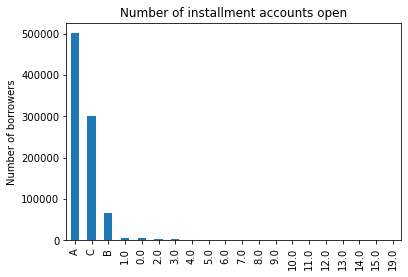

In [34]:
fig = df.open_il_24m.value_counts().plot.bar()
fig.set_title('Number of installment accounts open')
fig.set_ylabel('Number of borrowers')